In [1]:
# Keras Dataset

import tensorflow as tf
import keras

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
X_train[0].shape

(28, 28)

In [7]:
y_train[0]

np.uint8(5)

In [8]:
# Each data point is nothing but a pixel value

In [9]:
from matplotlib import pyplot as plt

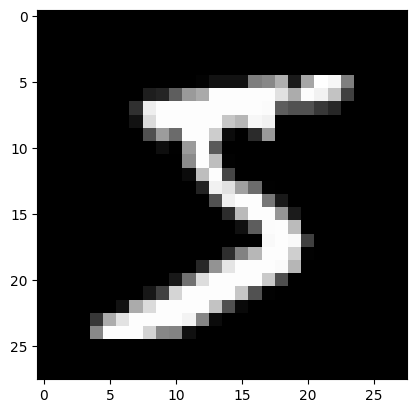

In [10]:
plt.imshow(X_train[0], cmap = 'grey')

In [15]:
for i in X_train[0]:
    print(i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]
[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253 242 195  64   0   0   0   0]
[  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0]
[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0

In [18]:
def look_data(idx):
    print("The Label: ", y_train[idx])
    plt.imshow(X_train[idx], cmap = 'grey')

The Label:  2


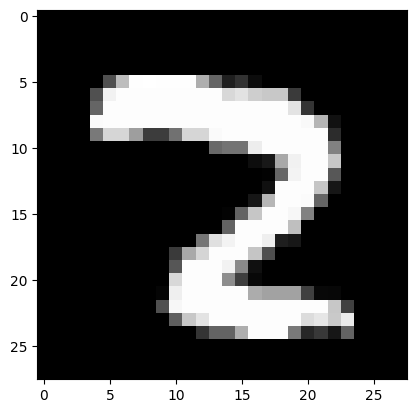

In [19]:
look_data(28)

The Label:  7


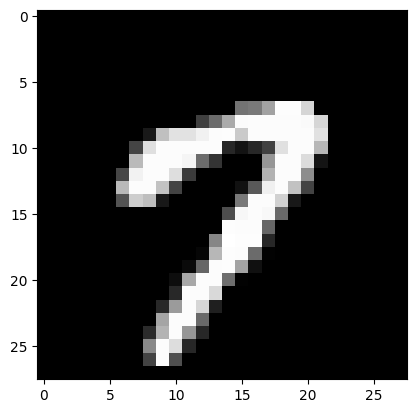

In [20]:
look_data(15)

In [21]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


In [22]:
import numpy as np

In [23]:
# Reshape your data, to make it look tabular
# Rescale your data
# Keras Sequential Model
# Multiclass, so choose your activation function accordingly

In [24]:
# Resclae your data
max(X_train[00].flatten()),min(X_train[00].flatten())

(np.uint8(255), np.uint8(0))

In [25]:
#Normalize
X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
max(X_train[00].flatten()), min(X_train[00].flatten())

(np.float64(1.0), np.float64(0.0))

In [33]:
#Reshape the Data

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [34]:
X_train.shape, X_train_flattened.shape

((60000, 28, 28), (60000, 784))

In [36]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [39]:
#Keras Model
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (784, ), activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [40]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy']
             )

In [41]:
# Train the model

history = model.fit(X_train_flattened, y_train, epochs = 5, validation_data = (X_test_flattened, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8797 - loss: 0.4327 - val_accuracy: 0.9255 - val_loss: 0.2566
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9319 - loss: 0.2422 - val_accuracy: 0.9317 - val_loss: 0.2336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9415 - loss: 0.2080 - val_accuracy: 0.9358 - val_loss: 0.2126
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9457 - loss: 0.1880 - val_accuracy: 0.9425 - val_loss: 0.1922
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9508 - loss: 0.1728 - val_accuracy: 0.9448 - val_loss: 0.1873


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9448 - loss: 0.1873
Test Loss: 0.1873
Test Accuracy: 0.9448


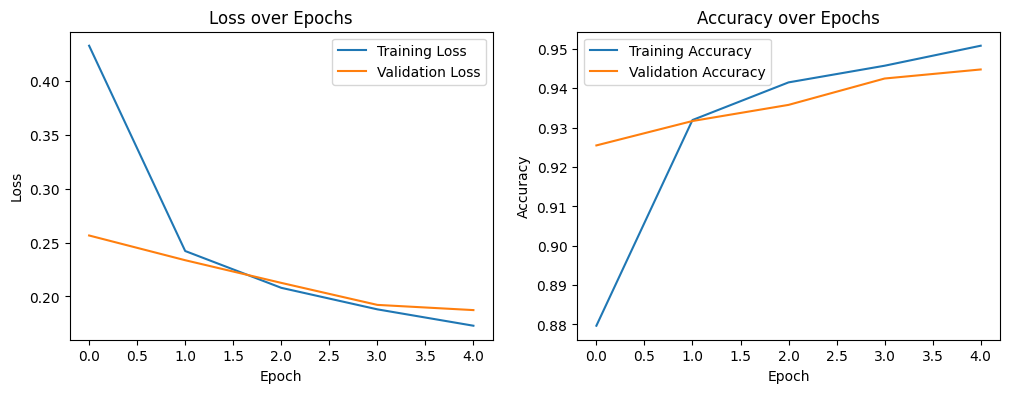

In [42]:
loss, accuracy = model.evaluate(X_test_flattened, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
model = keras.Sequential([
    keras.Input(shape = (784, )),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax')
])

print("Model architecture updated successfully, addressing input_shape warning")

Model architecture updated successfully, addressing input_shape warning


In [52]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [53]:
history = model.fit(X_train_flattened, y_train, epochs = 5, validation_data = (X_test_flattened, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9101 - loss: 0.3054 - val_accuracy: 0.9521 - val_loss: 0.1490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9602 - loss: 0.1337 - val_accuracy: 0.9701 - val_loss: 0.0952
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9717 - loss: 0.0971 - val_accuracy: 0.9717 - val_loss: 0.0918
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9770 - loss: 0.0760 - val_accuracy: 0.9741 - val_loss: 0.0870
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9812 - loss: 0.0618 - val_accuracy: 0.9754 - val_loss: 0.0809


In [54]:
# Build Keras model without flatenning the data
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])


C:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
# Train the model
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9044 - loss: 0.3191 - val_accuracy: 0.9565 - val_loss: 0.1421
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9584 - loss: 0.1364 - val_accuracy: 0.9698 - val_loss: 0.0950
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9697 - loss: 0.1002 - val_accuracy: 0.9753 - val_loss: 0.0789
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9765 - loss: 0.0791 - val_accuracy: 0.9761 - val_loss: 0.0754
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9803 - loss: 0.0644 - val_accuracy: 0.9759 - val_loss: 0.0826
